# CSX46

## Class session 6:  BFS
Objective: write and test a function that can compute single-vertex shortest paths in an unweighted simple graph.

Let's load the packages that we will need

In [1]:
suppressPackageStartupMessages(library(igraph))

Set the random number seed to 1337 using `set.seed`. Make a simple 10-vertex random (Barabasi-Albert model) graph.  Set the random number seed so that the graph is always the same, for purposes of reproducibility (we want to know that the "hub" vertex will be vertex 2, and we will test your BFS function starting at that "hub" vertex).

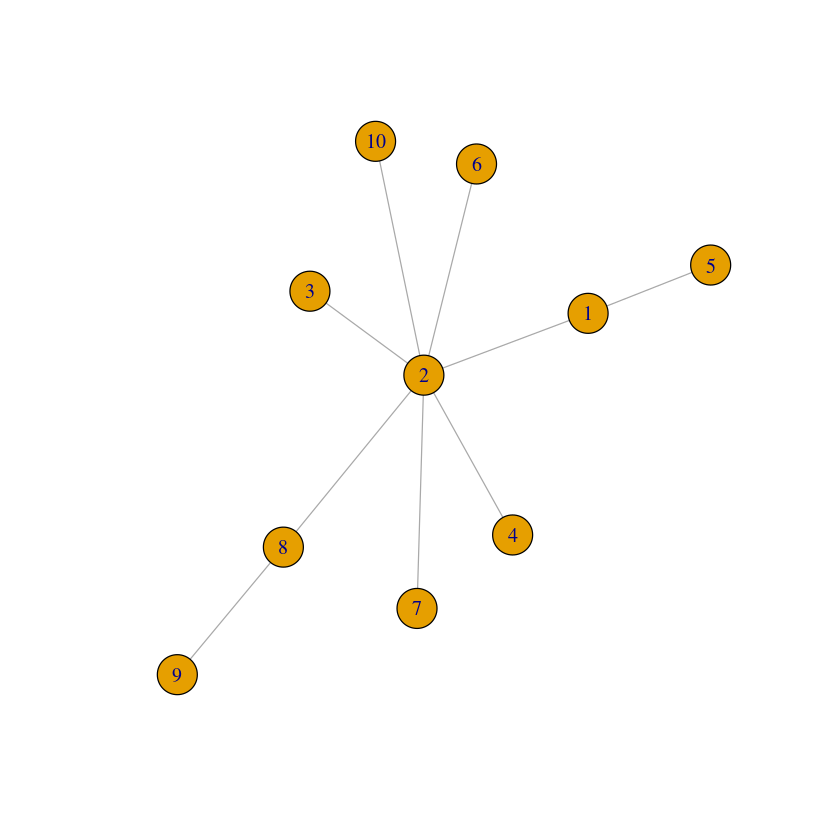

In [2]:
set.seed(1337)
g <- barabasi.game(10, directed=FALSE)
plot(g)

In [3]:
is(V(g))

[1] "igraph.vs"

Create a function `bfs_single_vertex` that accepts two arguments, `p_graph` and `p_vertex`, and returns the vector of distances from vertex `p_vertex` to all the other vertices in the graph.

In [4]:
# create an igraph.vs object by calling the V function and passing g to it; assign the vs object to name "vertices"
# compute N, the number of vertices by calling length on the vertices object
# initialize "queue" array (length N, containing NA)
# initialize distances array (length N, containing NA)
# set "p_vertex" entry of distances array to be 0
# while write_ptr is gerater than read_ptr:
# obtain the vertex ID of the entry at index "read_ptr" in the queue array, as cur_vertex_num
# increment read_ptr
# get the distance to cur_vertex_num, from the "distances" array
# get the neighbors of vertex cur_vertex_num in the graph, using the igraph "neighbors" func
# for each vertex_neighbor in the array vertex_neighbors
#    if the distances[vertex_neighbor] is NA:
#         (1) set the distance to vertex_neighbor (in "distances" vector) to the distance to
#           cur_vertex_num, plus one
#         (2) add neighbor to the queue
#         put vertex_neighbor at position write_ptr in the queue array
#         increment write_ptr
# end-while
# return "distances"

bfs_single_vertex <- function(p_graph, p_vertex) {
    vertices <- V(p_graph)
    stopifnot(p_vertex %in% vertices)
    N <- length(vertices)
    distances <- rep(NA, N)
    distances[p_vertex] <- 0
    queue <- c(p_vertex, rep(NA, N-1))
    read_ptr <- 1
    write_ptr <- 2

    while(write_ptr > read_ptr) {
        cur_vertex_num <- queue[read_ptr]
        read_ptr <- read_ptr + 1
        cur_vertex_distance <- distances[cur_vertex_num]
        stopifnot(! is.na(cur_vertex_distance))
        vertex_neighbors <- neighbors(p_graph, cur_vertex_num)
        for (vertex_neighbor in vertex_neighbors) {
            if (is.na(distances[vertex_neighbor])) {
                distances[vertex_neighbor] <- cur_vertex_distance + 1
                queue[write_ptr] <- vertex_neighbor
                write_ptr <- write_ptr + 1
            }
        }
    }

    distances
 }

Test out your function, starting at vertex 2

In [5]:
bfs_single_vertex(g, 2)

[1] 1 0 1 1 2 1 1 1 2 1

In [6]:
shortest.paths(g, v=2)

1,0,1,1,2,1,1,1,2,1


Now let's define a function sp_matrix that computes the all-pairs shortest-paths distances and puts them in a matrix. You will have to use V, bfs_single_vertex, length, lapply, cbind, and do.call.

In [7]:
sp_matrix <- function(p_graph) {
    do.call(cbind, lapply(1:length(V(p_graph)), function(vi) { bfs_single_vertex(g, vi) }))
}

Now let's test out our function

In [8]:
sp_matrix(g)

0,1,2,2,1,2,2,2,3,2
1,0,1,1,2,1,1,1,2,1
2,1,0,2,3,2,2,2,3,2
2,1,2,0,3,2,2,2,3,2
1,2,3,3,0,3,3,3,4,3
2,1,2,2,3,0,2,2,3,2
2,1,2,2,3,2,0,2,3,2
2,1,2,2,3,2,2,0,1,2
3,2,3,3,4,3,3,1,0,3
2,1,2,2,3,2,2,2,3,0
